# Feynman Diagrams: Fundamentals of Quantum Field Theory Visualization

## Introduction

Feynman diagrams are pictorial representations of the mathematical expressions describing the behavior and interaction of subatomic particles. Developed by Richard Feynman in 1948, these diagrams provide an intuitive way to visualize and calculate scattering amplitudes in quantum field theory (QFT).

## Theoretical Foundation

### The S-Matrix and Perturbation Theory

In quantum field theory, we compute the probability amplitude for a process using the **S-matrix** (scattering matrix). The S-matrix element between initial state $|i\rangle$ and final state $|f\rangle$ is:

$$S_{fi} = \langle f | S | i \rangle$$

The S-matrix can be expanded perturbatively in powers of the coupling constant $g$:

$$S = \mathbb{1} + iT = \mathbb{1} + \sum_{n=1}^{\infty} \frac{(-i)^n}{n!} \int d^4x_1 \cdots d^4x_n \, T\{\mathcal{H}_I(x_1) \cdots \mathcal{H}_I(x_n)\}$$

where $\mathcal{H}_I$ is the interaction Hamiltonian density and $T$ denotes time-ordering.

### Quantum Electrodynamics (QED)

The simplest and most successful quantum field theory is **Quantum Electrodynamics (QED)**, which describes the interaction between electrons and photons. The QED Lagrangian density is:

$$\mathcal{L}_{\text{QED}} = \bar{\psi}(i\gamma^\mu \partial_\mu - m)\psi - \frac{1}{4}F_{\mu\nu}F^{\mu\nu} - e\bar{\psi}\gamma^\mu \psi A_\mu$$

where:
- $\psi$ is the electron field (Dirac spinor)
- $A_\mu$ is the photon field (electromagnetic four-potential)
- $F_{\mu\nu} = \partial_\mu A_\nu - \partial_\nu A_\mu$ is the electromagnetic field tensor
- $e$ is the electron charge (coupling constant)
- $\gamma^\mu$ are the Dirac gamma matrices

## Feynman Rules for QED

### Propagators

**Electron Propagator** (internal fermion line):
$$\frac{i(\not{p} + m)}{p^2 - m^2 + i\epsilon} = \frac{i}{\not{p} - m + i\epsilon}$$

where $\not{p} = \gamma^\mu p_\mu$ is the Feynman slash notation.

**Photon Propagator** (internal photon line, Feynman gauge):
$$\frac{-ig_{\mu\nu}}{q^2 + i\epsilon}$$

### Vertex Factor

**QED Vertex** (electron-photon interaction):
$$-ie\gamma^\mu$$

### External Lines

- **Incoming electron**: $u(p, s)$
- **Outgoing electron**: $\bar{u}(p, s)$
- **Incoming positron**: $\bar{v}(p, s)$
- **Outgoing positron**: $v(p, s)$
- **Incoming photon**: $\epsilon_\mu(k, \lambda)$
- **Outgoing photon**: $\epsilon_\mu^*(k, \lambda)$

## Diagram Construction Rules

1. **Draw all topologically distinct diagrams** connecting initial and final states
2. **Assign momenta** to all lines, conserving momentum at each vertex
3. **Apply Feynman rules** for each element
4. **Integrate over internal momenta**: $\int \frac{d^4k}{(2\pi)^4}$
5. **Include symmetry factors** for identical particles
6. **Apply fermion sign rules** for closed loops

## Computational Visualization

We will now implement a Python visualization system for basic Feynman diagrams. This will help illustrate the graphical conventions and provide a foundation for understanding more complex processes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Arc
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# Set up publication-quality plotting
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [2]:
def draw_fermion_line(ax, start, end, label=None, label_pos=0.5, arrow=True):
    """
    Draw a fermion line (solid line with arrow).
    
    Parameters:
    -----------
    ax : matplotlib axis
    start : tuple (x, y)
    end : tuple (x, y)
    label : str, optional
    label_pos : float, position along line for label (0 to 1)
    arrow : bool, whether to draw arrow
    """
    if arrow:
        ax.annotate('', xy=end, xytext=start,
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    else:
        ax.plot([start[0], end[0]], [start[1], end[1]], 'k-', lw=2)
    
    if label:
        mid_x = start[0] + label_pos * (end[0] - start[0])
        mid_y = start[1] + label_pos * (end[1] - start[1])
        # Offset label perpendicular to line
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        length = np.sqrt(dx**2 + dy**2)
        offset = 0.15
        ax.text(mid_x - offset*dy/length, mid_y + offset*dx/length, 
               label, fontsize=12, ha='center', va='center')


def draw_photon_line(ax, start, end, n_waves=6, label=None):
    """
    Draw a photon line (wavy line).
    
    Parameters:
    -----------
    ax : matplotlib axis
    start : tuple (x, y)
    end : tuple (x, y)
    n_waves : int, number of wave oscillations
    label : str, optional
    """
    x0, y0 = start
    x1, y1 = end
    
    # Calculate line properties
    length = np.sqrt((x1-x0)**2 + (y1-y0)**2)
    angle = np.arctan2(y1-y0, x1-x0)
    
    # Generate wavy line points
    t = np.linspace(0, 1, 200)
    wave_amp = 0.08
    
    # Parametric wavy line
    x_line = x0 + t * (x1 - x0)
    y_line = y0 + t * (y1 - y0)
    
    # Add perpendicular oscillation
    perp_x = -np.sin(angle)
    perp_y = np.cos(angle)
    
    wave = wave_amp * np.sin(2 * np.pi * n_waves * t)
    x_wave = x_line + wave * perp_x
    y_wave = y_line + wave * perp_y
    
    ax.plot(x_wave, y_wave, 'b-', lw=1.5)
    
    if label:
        mid_x = (x0 + x1) / 2
        mid_y = (y0 + y1) / 2
        ax.text(mid_x + 0.15*perp_x, mid_y + 0.15*perp_y, 
               label, fontsize=12, ha='center', va='center', color='blue')


def draw_gluon_line(ax, start, end, n_loops=5, label=None):
    """
    Draw a gluon line (coiled/spring-like line).
    
    Parameters:
    -----------
    ax : matplotlib axis
    start : tuple (x, y)
    end : tuple (x, y)
    n_loops : int, number of coils
    label : str, optional
    """
    x0, y0 = start
    x1, y1 = end
    
    length = np.sqrt((x1-x0)**2 + (y1-y0)**2)
    angle = np.arctan2(y1-y0, x1-x0)
    
    t = np.linspace(0, 1, 500)
    coil_amp = 0.1
    
    # Parametric coiled line (3D helix projected to 2D)
    x_line = x0 + t * (x1 - x0)
    y_line = y0 + t * (y1 - y0)
    
    perp_x = -np.sin(angle)
    perp_y = np.cos(angle)
    
    # Create coil effect
    coil = coil_amp * np.sin(2 * np.pi * n_loops * t) * (1 - np.abs(2*t - 1)**4)
    x_coil = x_line + coil * perp_x
    y_coil = y_line + coil * perp_y
    
    ax.plot(x_coil, y_coil, 'g-', lw=1.5)
    
    if label:
        mid_x = (x0 + x1) / 2
        mid_y = (y0 + y1) / 2
        ax.text(mid_x + 0.2*perp_x, mid_y + 0.2*perp_y, 
               label, fontsize=12, ha='center', va='center', color='green')


def draw_vertex(ax, pos, size=0.05):
    """
    Draw a vertex point.
    """
    circle = plt.Circle(pos, size, color='black', fill=True)
    ax.add_patch(circle)

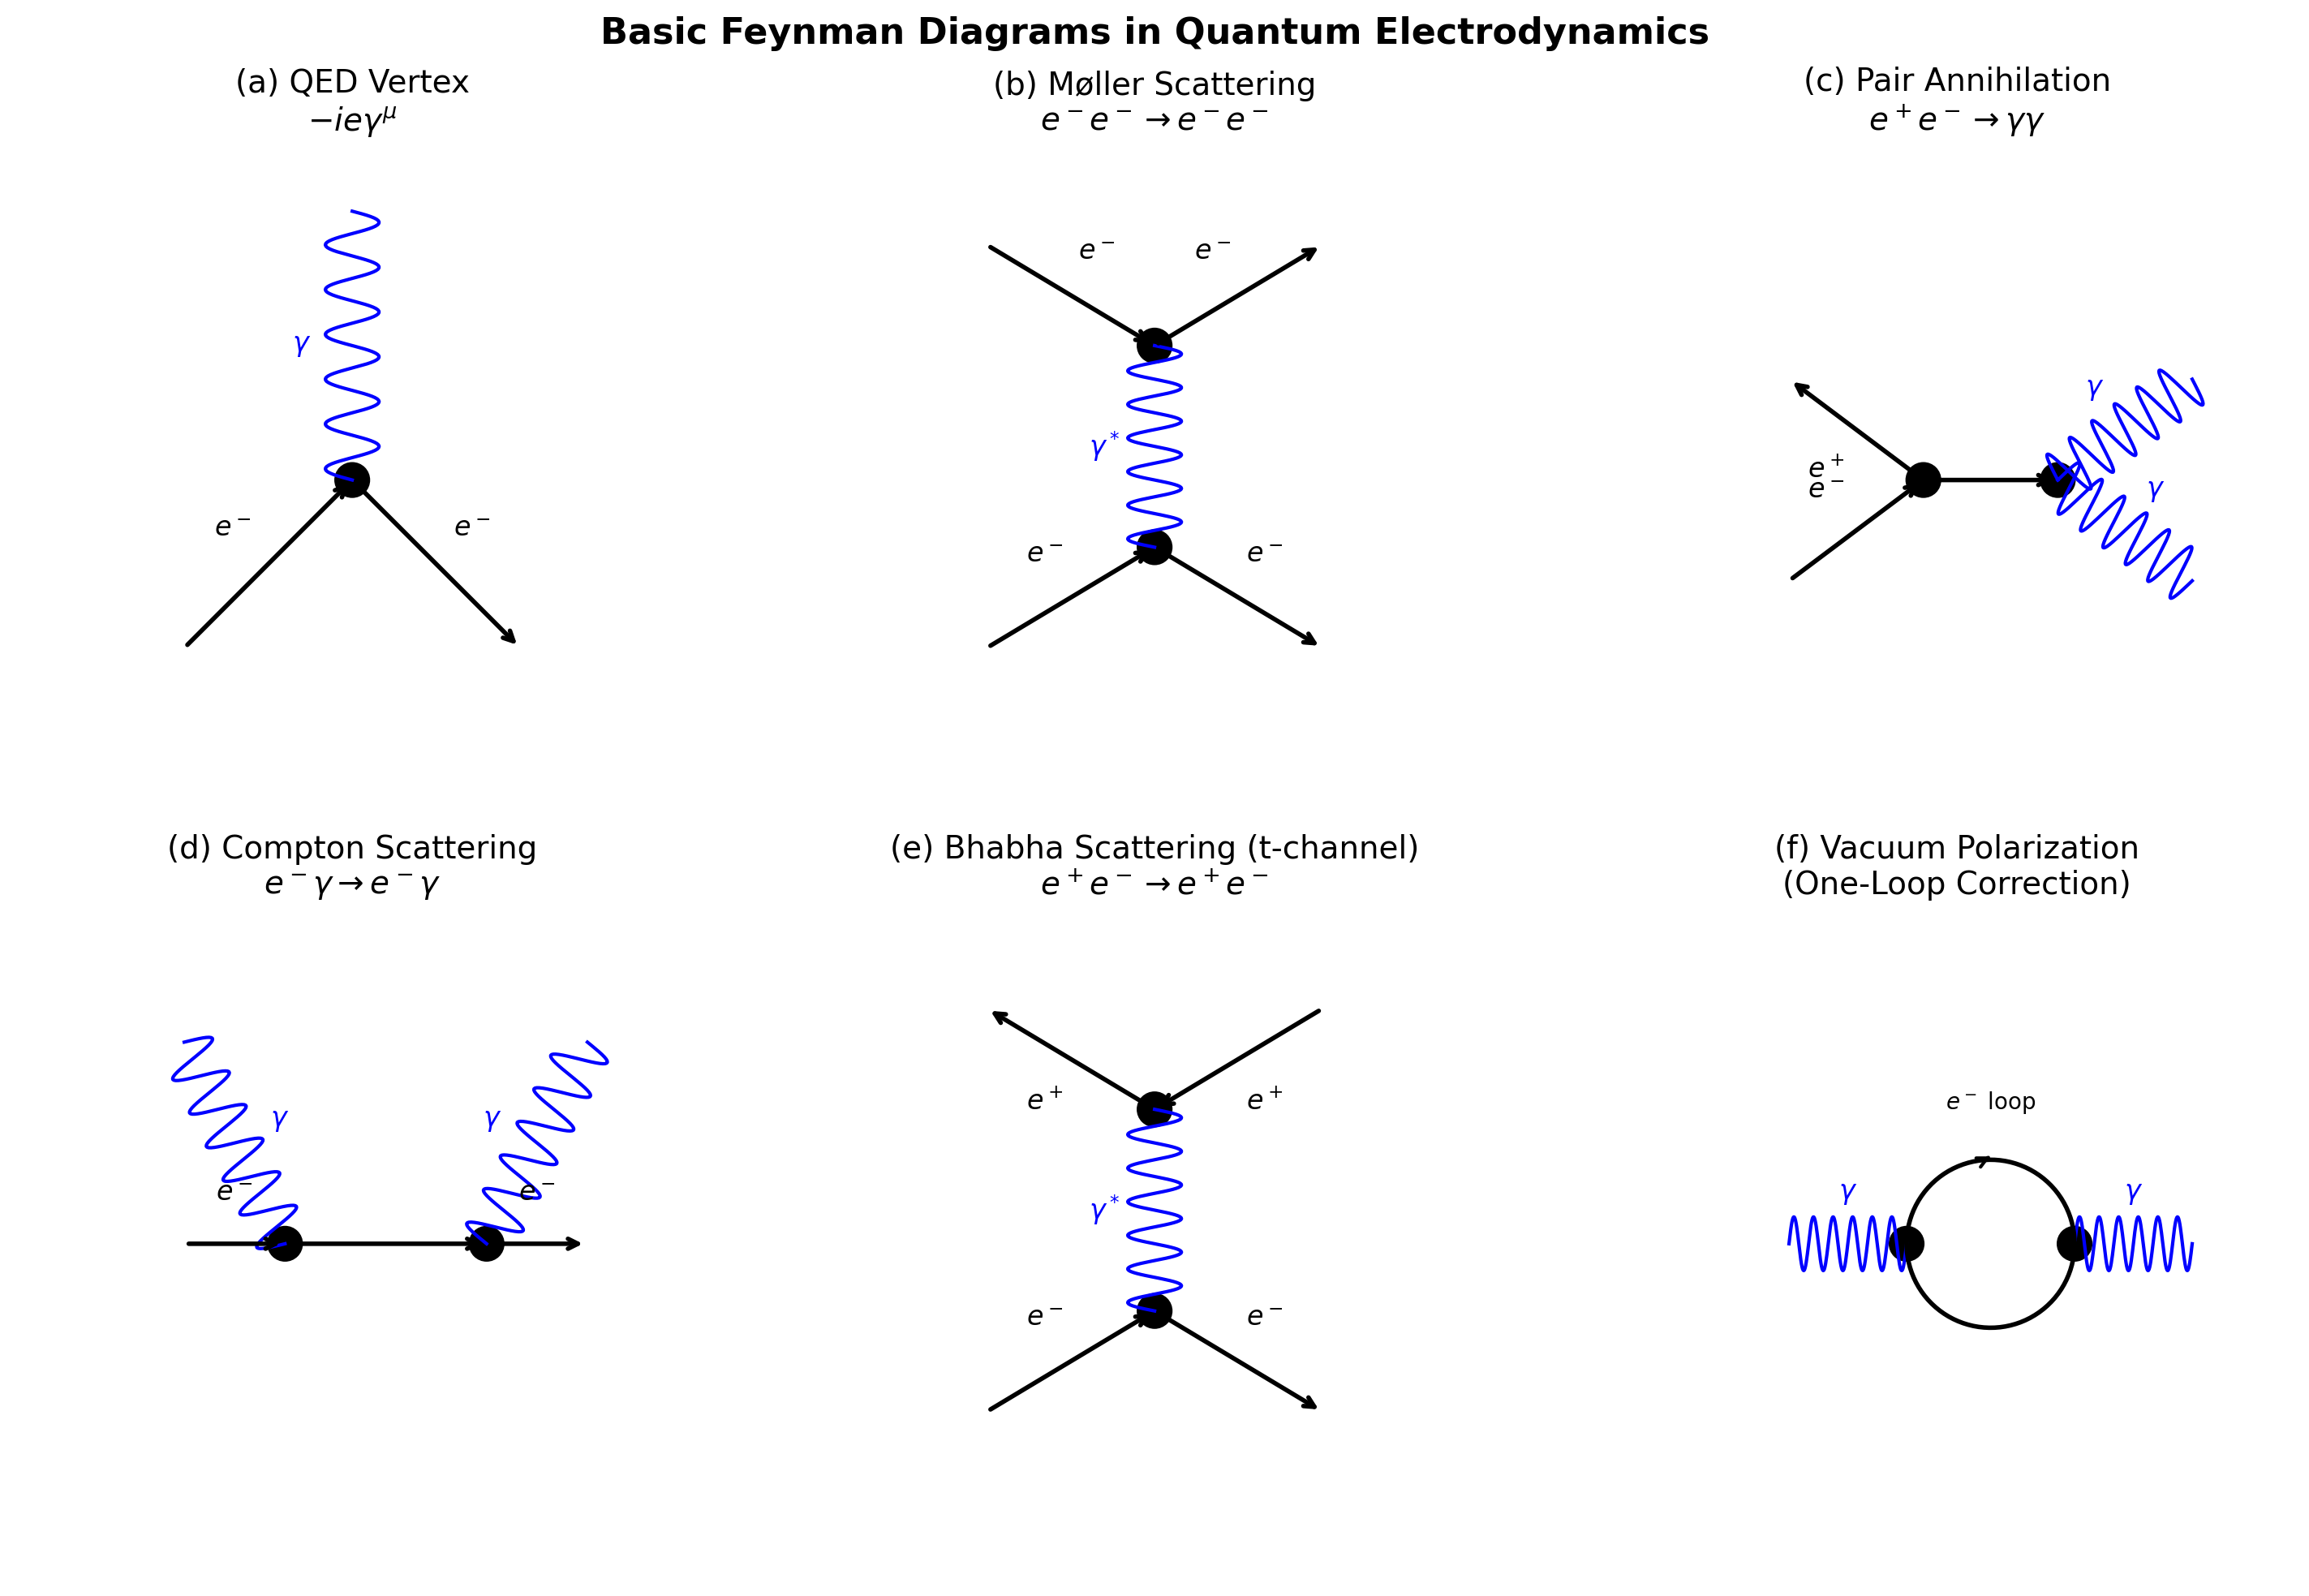

Feynman diagrams saved to plot.png


In [3]:
# Create figure with multiple Feynman diagrams
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Basic Feynman Diagrams in Quantum Electrodynamics', fontsize=16, fontweight='bold')

# Diagram 1: Electron-Photon Vertex (Basic QED Vertex)
ax1 = axes[0, 0]
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('(a) QED Vertex\n$-ie\\gamma^\\mu$')

# Draw vertex
vertex = (0.5, 0.5)
draw_vertex(ax1, vertex)

# Incoming electron
draw_fermion_line(ax1, (0, 0), vertex, label='$e^-$')
# Outgoing electron
draw_fermion_line(ax1, vertex, (1, 0), label="$e^-$")
# Photon
draw_photon_line(ax1, vertex, (0.5, 1.3), label='$\\gamma$')

# Diagram 2: Electron-Electron Scattering (Møller Scattering)
ax2 = axes[0, 1]
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('(b) Møller Scattering\n$e^- e^- \\to e^- e^-$')

v1 = (0.5, 0.3)
v2 = (0.5, 0.9)
draw_vertex(ax2, v1)
draw_vertex(ax2, v2)

# Electron lines
draw_fermion_line(ax2, (0, 0), v1, label='$e^-$')
draw_fermion_line(ax2, v1, (1, 0), label="$e^-$")
draw_fermion_line(ax2, (0, 1.2), v2, label='$e^-$')
draw_fermion_line(ax2, v2, (1, 1.2), label="$e^-$")

# Virtual photon
draw_photon_line(ax2, v1, v2, label='$\\gamma^*$')

# Diagram 3: Electron-Positron Annihilation
ax3 = axes[0, 2]
ax3.set_xlim(-0.5, 1.5)
ax3.set_ylim(-0.5, 1.5)
ax3.set_aspect('equal')
ax3.axis('off')
ax3.set_title('(c) Pair Annihilation\n$e^+ e^- \\to \\gamma \\gamma$')

v1 = (0.4, 0.5)
v2 = (0.8, 0.5)
draw_vertex(ax3, v1)
draw_vertex(ax3, v2)

# Incoming particles
draw_fermion_line(ax3, (0, 0.2), v1, label='$e^-$')
draw_fermion_line(ax3, v1, (0, 0.8), label='$e^+$')  # Reversed arrow for positron
# Internal electron line
draw_fermion_line(ax3, v1, v2, arrow=True)
# Outgoing photons
draw_photon_line(ax3, v2, (1.2, 0.2), label='$\\gamma$')
draw_photon_line(ax3, v2, (1.2, 0.8), label='$\\gamma$')

# Diagram 4: Compton Scattering
ax4 = axes[1, 0]
ax4.set_xlim(-0.5, 1.5)
ax4.set_ylim(-0.5, 1.5)
ax4.set_aspect('equal')
ax4.axis('off')
ax4.set_title('(d) Compton Scattering\n$e^- \\gamma \\to e^- \\gamma$')

v1 = (0.3, 0.5)
v2 = (0.9, 0.5)
draw_vertex(ax4, v1)
draw_vertex(ax4, v2)

# Electron line through both vertices
draw_fermion_line(ax4, (0, 0.5), v1, label='$e^-$')
draw_fermion_line(ax4, v1, v2)
draw_fermion_line(ax4, v2, (1.2, 0.5), label="$e^-$")
# Photons
draw_photon_line(ax4, (0, 1.1), v1, label='$\\gamma$')
draw_photon_line(ax4, v2, (1.2, 1.1), label='$\\gamma$')

# Diagram 5: Bhabha Scattering (with both channels)
ax5 = axes[1, 1]
ax5.set_xlim(-0.5, 1.5)
ax5.set_ylim(-0.5, 1.5)
ax5.set_aspect('equal')
ax5.axis('off')
ax5.set_title('(e) Bhabha Scattering (t-channel)\n$e^+ e^- \\to e^+ e^-$')

v1 = (0.5, 0.3)
v2 = (0.5, 0.9)
draw_vertex(ax5, v1)
draw_vertex(ax5, v2)

# t-channel diagram
draw_fermion_line(ax5, (0, 0), v1, label='$e^-$')
draw_fermion_line(ax5, v1, (1, 0), label="$e^-$")
draw_fermion_line(ax5, v2, (0, 1.2), label='$e^+$')  # Reversed for positron
draw_fermion_line(ax5, (1, 1.2), v2, label="$e^+$")
draw_photon_line(ax5, v1, v2, label='$\\gamma^*$')

# Diagram 6: One-Loop Self-Energy (Vacuum Polarization)
ax6 = axes[1, 2]
ax6.set_xlim(-0.5, 1.5)
ax6.set_ylim(-0.5, 1.5)
ax6.set_aspect('equal')
ax6.axis('off')
ax6.set_title('(f) Vacuum Polarization\n(One-Loop Correction)')

# Photon lines
draw_photon_line(ax6, (0, 0.5), (0.35, 0.5), label='$\\gamma$')
draw_photon_line(ax6, (0.85, 0.5), (1.2, 0.5), label='$\\gamma$')

# Electron loop
theta = np.linspace(0, 2*np.pi, 100)
loop_r = 0.25
loop_cx, loop_cy = 0.6, 0.5
loop_x = loop_cx + loop_r * np.cos(theta)
loop_y = loop_cy + loop_r * np.sin(theta)
ax6.plot(loop_x, loop_y, 'k-', lw=2)

# Add arrows to indicate fermion flow in loop
ax6.annotate('', xy=(0.6, 0.76), xytext=(0.58, 0.75),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
ax6.text(0.6, 0.9, '$e^-$ loop', fontsize=10, ha='center')

# Vertices
draw_vertex(ax6, (0.35, 0.5))
draw_vertex(ax6, (0.85, 0.5))

plt.tight_layout()
plt.savefig('feynman_diagrams_basics_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Feynman diagrams saved to plot.png")

## Calculating Scattering Amplitudes

Let us now demonstrate how to compute the matrix element for a simple process using the Feynman rules.

### Example: Electron-Muon Scattering

Consider the process $e^- \mu^- \to e^- \mu^-$ at tree level. This process has only one diagram (t-channel photon exchange).

The matrix element is:

$$i\mathcal{M} = [\bar{u}(p_3)(-ie\gamma^\mu)u(p_1)] \frac{-ig_{\mu\nu}}{q^2} [\bar{u}(p_4)(-ie\gamma^\nu)u(p_2)]$$

where $q = p_1 - p_3 = p_4 - p_2$ is the momentum transfer.

This simplifies to:

$$\mathcal{M} = \frac{e^2}{q^2} [\bar{u}(p_3)\gamma^\mu u(p_1)][\bar{u}(p_4)\gamma_\mu u(p_2)]$$

### Spin-Averaged Amplitude Squared

To get the unpolarized cross-section, we average over initial spins and sum over final spins:

$$\overline{|\mathcal{M}|^2} = \frac{1}{4} \sum_{\text{spins}} |\mathcal{M}|^2$$

Using trace technology and the completeness relations for spinors:

$$\sum_s u(p,s)\bar{u}(p,s) = \not{p} + m$$

We obtain:

$$\overline{|\mathcal{M}|^2} = \frac{e^4}{q^4} L^{\mu\nu}_{(e)} L_{\mu\nu}^{(\mu)}$$

where the leptonic tensors are:

$$L^{\mu\nu}_{(e)} = \text{Tr}[(\not{p}_3 + m_e)\gamma^\mu(\not{p}_1 + m_e)\gamma^\nu]$$

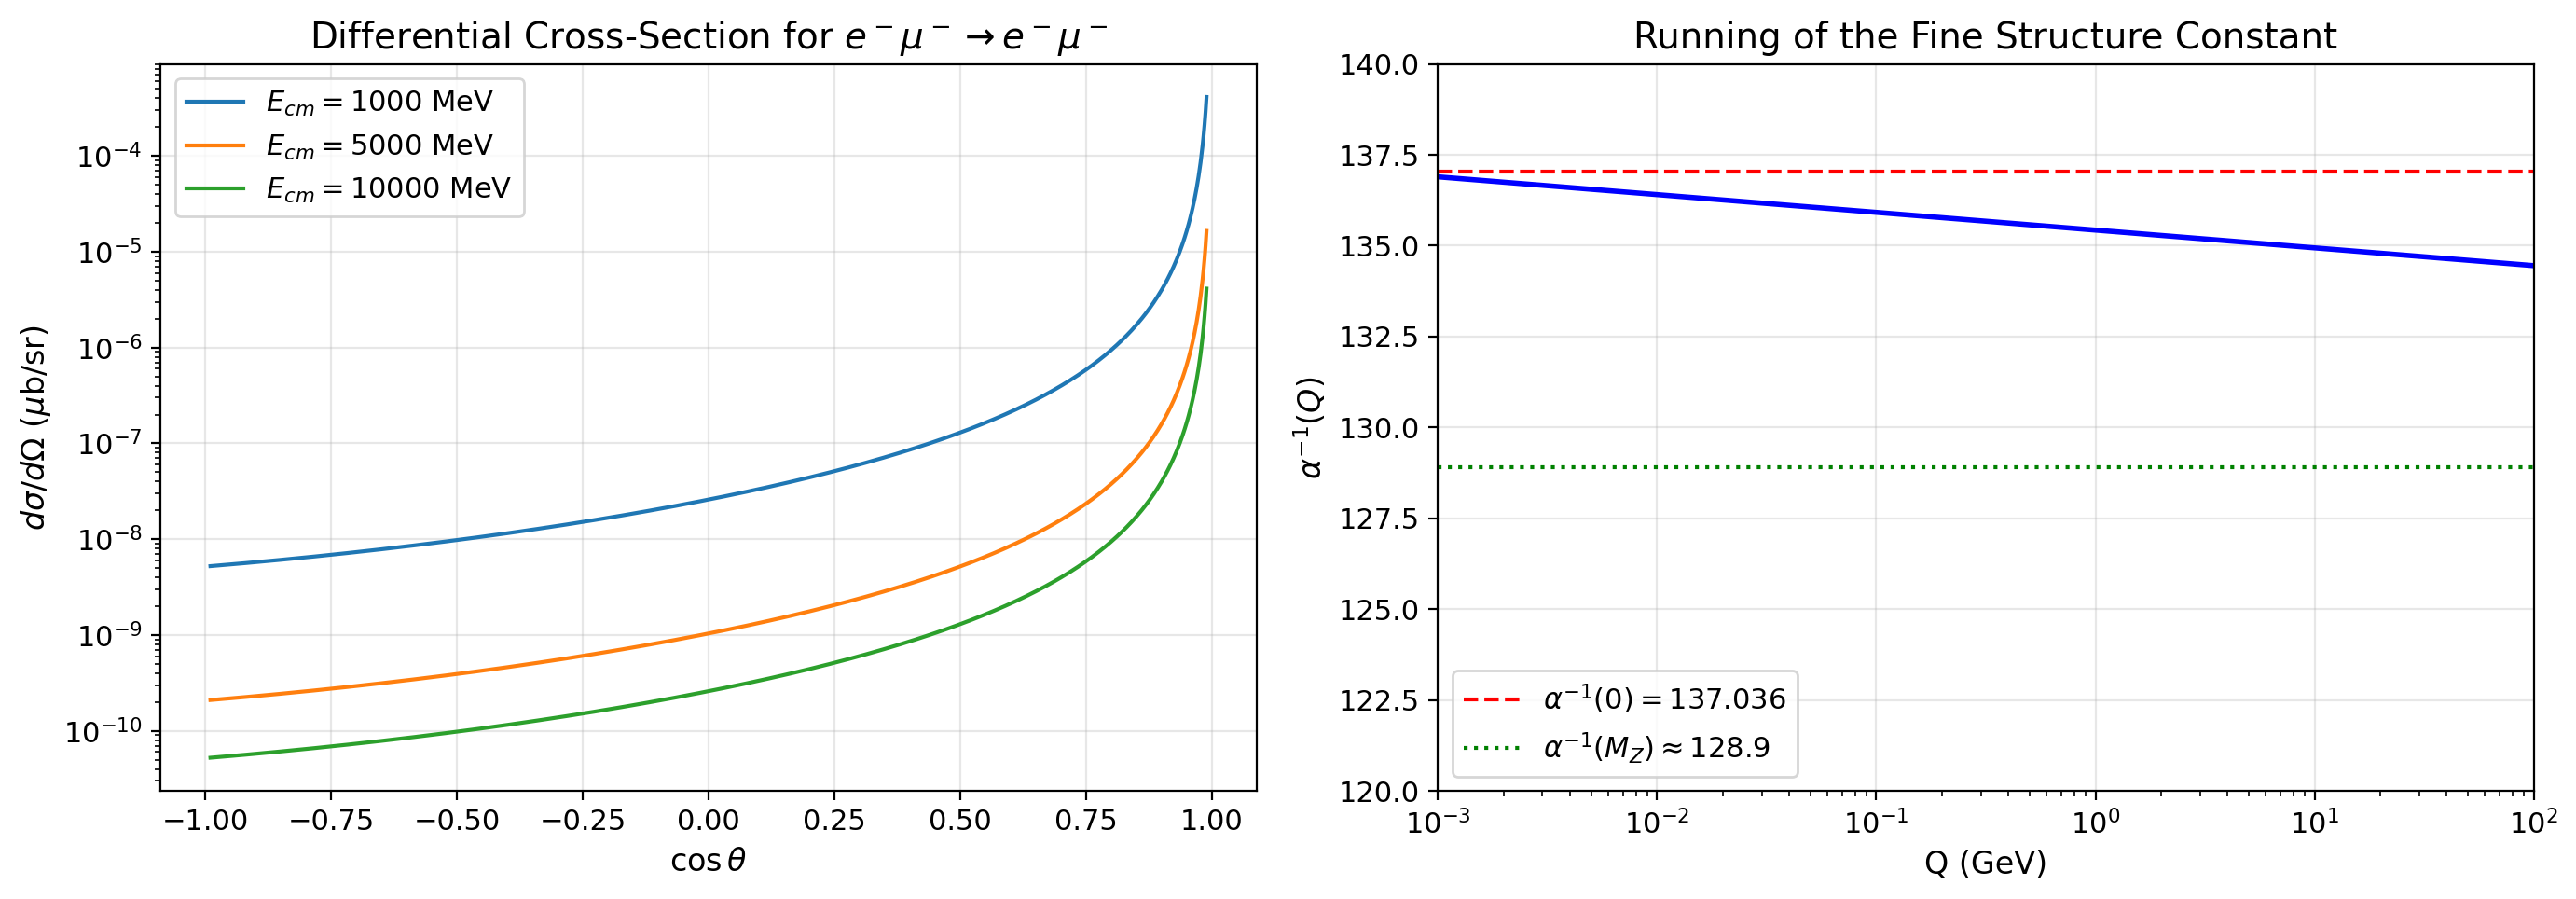


Cross-section calculations complete.
Fine structure constant α = 0.007297
At Q = M_Z ≈ 91 GeV, α⁻¹ ≈ 134.5


In [4]:
# Numerical demonstration: Cross-section calculation for e-mu scattering
# Using natural units (c = ħ = 1)

# Physical constants
alpha = 1/137.036  # Fine structure constant
m_e = 0.511  # Electron mass in MeV
m_mu = 105.66  # Muon mass in MeV

def mandelstam_variables(E_cm):
    """
    Calculate Mandelstam variables for e-mu scattering.
    
    s = (p1 + p2)^2 = E_cm^2
    t = (p1 - p3)^2 = momentum transfer squared
    u = (p1 - p4)^2
    
    With s + t + u = 2*m_e^2 + 2*m_mu^2
    """
    s = E_cm**2
    return s

def differential_cross_section(cos_theta, E_cm):
    """
    Differential cross-section for e-mu scattering in center-of-mass frame.
    
    dσ/dΩ = (α^2 / 4s) * (s^2 + u^2) / t^2
    
    In the high-energy limit (neglecting masses).
    """
    s = E_cm**2
    
    # In CM frame, for massless particles:
    # t = -s/2 * (1 - cos_theta)
    # u = -s/2 * (1 + cos_theta)
    
    t = -s/2 * (1 - cos_theta)
    u = -s/2 * (1 + cos_theta)
    
    # Avoid division by zero at forward scattering
    t = np.where(np.abs(t) < 1e-10, 1e-10, t)
    
    # Cross-section in natural units (GeV^-2)
    # Convert to more useful units later
    dsigma_dOmega = (alpha**2 / (4 * s)) * (s**2 + u**2) / t**2
    
    return dsigma_dOmega

# Calculate cross-section for various CM energies
cos_theta_range = np.linspace(-0.99, 0.99, 1000)
E_cm_values = [1000, 5000, 10000]  # MeV

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Angular distribution
for E_cm in E_cm_values:
    dsigma = differential_cross_section(cos_theta_range, E_cm)
    # Convert to microbarns (1 GeV^-2 = 0.3894 mb)
    dsigma_mb = dsigma * 0.3894 * 1e3  # in microbarns
    ax1.semilogy(cos_theta_range, dsigma_mb, label=f'$E_{{cm}} = {E_cm}$ MeV')

ax1.set_xlabel(r'$\cos\theta$', fontsize=12)
ax1.set_ylabel(r'$d\sigma/d\Omega$ ($\mu$b/sr)', fontsize=12)
ax1.set_title('Differential Cross-Section for $e^- \\mu^- \\to e^- \\mu^-$', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Running of alpha (demonstration of loop corrections)
Q_values = np.logspace(0, 5, 100)  # Momentum transfer in MeV

def running_alpha(Q, alpha_0=1/137.036):
    """
    One-loop running of the fine structure constant.
    
    α(Q) = α(0) / (1 - (α(0)/3π) * ln(Q^2/m_e^2))
    
    This is a simplified version; full calculation includes all charged fermions.
    """
    # Sum over leptons (simplified)
    beta_0 = alpha_0 / (3 * np.pi)
    log_term = np.log(Q**2 / m_e**2)
    
    # Prevent unphysical values
    denominator = 1 - beta_0 * log_term
    denominator = np.where(denominator < 0.1, 0.1, denominator)
    
    return alpha_0 / denominator

alpha_running = running_alpha(Q_values)

ax2.semilogx(Q_values/1000, 1/alpha_running, 'b-', lw=2)
ax2.axhline(y=137.036, color='r', linestyle='--', label=r'$\alpha^{-1}(0) = 137.036$')
ax2.axhline(y=128.9, color='g', linestyle=':', label=r'$\alpha^{-1}(M_Z) \approx 128.9$')

ax2.set_xlabel('Q (GeV)', fontsize=12)
ax2.set_ylabel(r'$\alpha^{-1}(Q)$', fontsize=12)
ax2.set_title('Running of the Fine Structure Constant', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim([1e-3, 100])
ax2.set_ylim([120, 140])

plt.tight_layout()
plt.savefig('feynman_diagrams_basics_visualization.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nCross-section calculations complete.")
print(f"Fine structure constant α = {alpha:.6f}")
print(f"At Q = M_Z ≈ 91 GeV, α⁻¹ ≈ {1/running_alpha(91000):.1f}")

## Summary

### Key Concepts Covered

1. **Feynman diagrams** provide a visual representation of particle interactions in quantum field theory

2. **Feynman rules** translate diagrams into mathematical expressions:
   - Propagators for internal lines
   - Vertex factors for interactions
   - External line factors for physical particles

3. **Basic QED processes** include:
   - Electron-electron scattering (Møller)
   - Electron-positron scattering (Bhabha)
   - Pair annihilation/creation
   - Compton scattering

4. **Loop corrections** (like vacuum polarization) lead to:
   - Renormalization of coupling constants
   - Running of α with energy scale
   - Precision predictions matching experiment

### Further Reading

- Peskin & Schroeder, "An Introduction to Quantum Field Theory"
- Mandl & Shaw, "Quantum Field Theory"
- Griffiths, "Introduction to Elementary Particles"